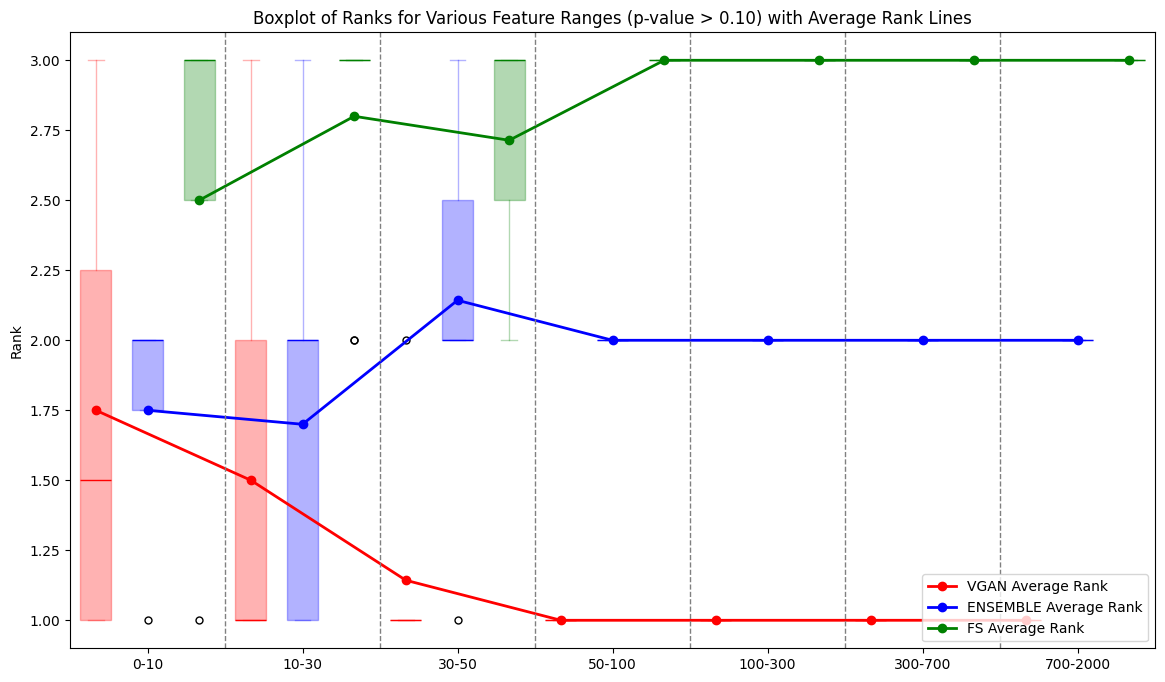

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Full_table_with_ranks.csv', delimiter=';')

# Correcting the p-value for the "optdigits" dataset
df.loc[df['Data'] == 'optdigits', 'p-value'] = 0

# Convert p-value column to numeric
df['p-value'] = pd.to_numeric(df['p-value'].str.replace(',',
                              '.'), errors='coerce')

# Filter the datasets where p-value > 0.10
filtered_pvalue_df = df
filtered_pvalue_df = df[df['p-value'] > 0.10]

# Further filter by the feature ranges
filtered_pvalue_0_10 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] > 0) & (filtered_pvalue_df['# Features'] <= 10)]
filtered_pvalue_10_30 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 10) & (filtered_pvalue_df['# Features'] <= 30)]
filtered_pvalue_30_50 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 30) & (filtered_pvalue_df['# Features'] <= 50)]
filtered_pvalue_50_100 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 50) & (filtered_pvalue_df['# Features'] <= 100)]
filtered_pvalue_100_300 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 100) & (filtered_pvalue_df['# Features'] <= 300)]
filtered_pvalue_300_700 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 300) & (filtered_pvalue_df['# Features'] <= 700)]
filtered_pvalue_700_2000 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 700) & (filtered_pvalue_df['# Features'] <= 2000)]

# Extract VGAN, ENSEMBLE, and FS ranks for these filtered datasets
vgan_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK VGAN']
vgan_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK VGAN']
vgan_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK VGAN']
vgan_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK VGAN']
vgan_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK VGAN']
vgan_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK VGAN']
vgan_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK VGAN']

ensemble_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK ENS']
ensemble_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK ENS']
ensemble_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK ENS']
ensemble_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK ENS']
ensemble_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK ENS']
ensemble_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK ENS']
ensemble_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK ENS']

fs_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK FS']
fs_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK FS']
fs_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK FS']
fs_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK FS']
fs_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK FS']
fs_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK FS']
fs_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK FS']

# Calculating the average ranks for each group
all_averages = {
    "0-10": vgan_pvalue_ranks_0_10.mean(),
    "10-30": vgan_pvalue_ranks_10_30.mean(),
    "30-50": vgan_pvalue_ranks_30_50.mean(),
    "50-100": vgan_pvalue_ranks_50_100.mean(),
    "100-300": vgan_pvalue_ranks_100_300.mean(),
    "300-700": vgan_pvalue_ranks_300_700.mean(),
    "700-2000": vgan_pvalue_ranks_700_2000.mean()
}


# Creating the combined boxplot with individual boxplots, line plots of the average ranks, and vertical lines to indicate group limits
plt.figure(figsize=(14, 8))

# Creating the boxplots for VGAN, ENSEMBLE, and FS
boxplot_vgan = plt.boxplot(
    [vgan_pvalue_ranks_0_10, vgan_pvalue_ranks_10_30, vgan_pvalue_ranks_30_50, vgan_pvalue_ranks_50_100,
        vgan_pvalue_ranks_100_300, vgan_pvalue_ranks_300_700, vgan_pvalue_ranks_700_2000],
    positions=[1, 4, 7, 10, 13, 16, 19],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='red', color='red', alpha=0.3),
    whiskerprops=dict(color='red', alpha=0.3),
    capprops=dict(color='red', alpha=0.3),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markersize=5,
                    linestyle='none', linewidth=2, color='red')
)

boxplot_ensemble = plt.boxplot(
    [ensemble_pvalue_ranks_0_10, ensemble_pvalue_ranks_10_30, ensemble_pvalue_ranks_30_50, ensemble_pvalue_ranks_50_100,
        ensemble_pvalue_ranks_100_300, ensemble_pvalue_ranks_300_700, ensemble_pvalue_ranks_700_2000],
    positions=[2, 5, 8, 11, 14, 17, 20],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='blue', color='blue', alpha=0.3),
    whiskerprops=dict(color='blue', alpha=0.3),
    capprops=dict(color='blue', alpha=0.3),
    medianprops=dict(color='blue'),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color='blue')
)

boxplot_fs = plt.boxplot(
    [fs_pvalue_ranks_0_10, fs_pvalue_ranks_10_30, fs_pvalue_ranks_30_50, fs_pvalue_ranks_50_100,
        fs_pvalue_ranks_100_300, fs_pvalue_ranks_300_700, fs_pvalue_ranks_700_2000],
    positions=[3, 6, 9, 12, 15, 18, 21],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='green', color='green', alpha=0.3),
    whiskerprops=dict(color='green', alpha=0.3),
    capprops=dict(color='green', alpha=0.3),
    medianprops=dict(color='green'),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color='green')
)

# Plotting the average ranks for VGAN, ENSEMBLE, and FS as line plots on top of the boxplots
plt.plot(
    [1, 4, 7, 10, 13, 16, 19],
    [all_averages["0-10"], all_averages["10-30"], all_averages["30-50"], all_averages["50-100"],
        all_averages["100-300"], all_averages["300-700"], all_averages["700-2000"]],
    color='red', marker='o', linestyle='-', linewidth=2, label='VGAN Average Rank'
)

plt.plot(
    [2, 5, 8, 11, 14, 17, 20],
    [ensemble_pvalue_ranks_0_10.mean(), ensemble_pvalue_ranks_10_30.mean(), ensemble_pvalue_ranks_30_50.mean(), ensemble_pvalue_ranks_50_100.mean(),
     ensemble_pvalue_ranks_100_300.mean(), ensemble_pvalue_ranks_300_700.mean(), ensemble_pvalue_ranks_700_2000.mean()],
    color='blue', marker='o', linestyle='-', linewidth=2, label='ENSEMBLE Average Rank'
)

plt.plot(
    [3, 6, 9, 12, 15, 18, 21],
    [fs_pvalue_ranks_0_10.mean(), fs_pvalue_ranks_10_30.mean(), fs_pvalue_ranks_30_50.mean(), fs_pvalue_ranks_50_100.mean(),
     fs_pvalue_ranks_100_300.mean(), fs_pvalue_ranks_300_700.mean(), fs_pvalue_ranks_700_2000.mean()],
    color='green', marker='o', linestyle='-', linewidth=2, label='FS Average Rank'
)

# Adding vertical lines to indicate the limits of each group on the x-axis
for x in [3.5, 6.5, 9.5, 12.5, 15.5, 18.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Setting the x-axis labels
plt.xticks([2, 5, 8, 11, 14, 17, 20], ['0-10', '10-30',
           '30-50', '50-100', '100-300', '300-700', '700-2000'])

plt.title('Boxplot of Ranks for Various Feature Ranges (p-value > 0.10) with Average Rank Lines')
plt.ylabel('Rank')
plt.legend()
plt.show()


In [60]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Load the data
df = pd.read_csv('Full_table_with_ranks.csv', delimiter=';')


df['p-value'] = pd.to_numeric(df['p-value'].str.replace(',',
                              '.'), errors='coerce')
df = df[df['p-value'] > 0.10]

# Extracting the ranks for each model
ranks_ens = df['RANK ENS']
ranks_fs = df['RANK FS']
ranks_vgan = df['RANK VGAN']

# Performing the Kruskal-Wallis test
kruskal_result = stats.kruskal(ranks_ens, ranks_fs, ranks_vgan)
print(f"Kruskal-Wallis Test Result: {kruskal_result}")

# If the p-value from Kruskal-Wallis test is significant, perform Conover-Iman test
if kruskal_result.pvalue < 0.05:
    conover_result = sp.posthoc_conover([ranks_ens, ranks_fs, ranks_vgan], p_adjust='holm')
    conover_result.index = ["Feature Bagging", "Full-Space", "VGAN"]
    conover_result.columns =  ["Feature Bagging", "Full-Space", "VGAN"]
    print("Conover-Iman Test Result:\n", conover_result)
    
else:
    print("Kruskal-Wallis test is not significant; no need to perform Conover-Iman test.")
print(f"Count of datasets:{df.index.__len__()}")

Kruskal-Wallis Test Result: KruskalResult(statistic=41.46153846153849, pvalue=9.9252468636048e-10)
Conover-Iman Test Result:
                  Feature Bagging    Full-Space          VGAN
Feature Bagging         1.000000  1.548208e-06  1.925507e-04
Full-Space              0.000002  1.000000e+00  1.124141e-13
VGAN                    0.000193  1.124141e-13  1.000000e+00
Count of datasets:26


In [36]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Load the data
df = pd.read_csv('Full_table_with_ranks.csv', delimiter=';')

# Correcting the p-value for the "optdigits" dataset
df.loc[df['Data'] == 'optdigits', 'p-value'] = 0
df['p-value'] = pd.to_numeric(df['p-value'].str.replace(',',
                              '.'), errors='coerce')
df = df[df['p-value'] < 0.10]

# Extracting the ranks for each model
ranks_ens = df['RANK ENS']
ranks_fs = df['RANK FS']
ranks_vgan = df['RANK VGAN']

# Performing the Kruskal-Wallis test
kruskal_result = stats.kruskal(ranks_ens, ranks_fs, ranks_vgan)
print(f"Kruskal-Wallis Test Result: {kruskal_result}")

# If the p-value from Kruskal-Wallis test is significant, perform Conover-Iman test
if kruskal_result.pvalue < 0.05:
    conover_result = sp.posthoc_conover([ranks_ens, ranks_fs, ranks_vgan], p_adjust='holm')
    conover_result.index = ["Feature Bagging", "Full-Space", "VGAN"]
    conover_result.columns =  ["Feature Bagging", "Full-Space", "VGAN"]
    print("Conover-Iman Test Result:\n", conover_result)
    
else:
    print("Kruskal-Wallis test is not significant; no need to perform Conover-Iman test.")
print(f"Count of datasets:{df.index.__len__()}")

Kruskal-Wallis Test Result: KruskalResult(statistic=10.06128888946965, pvalue=0.006534598026026722)
Conover-Iman Test Result:
                  Feature Bagging  Full-Space      VGAN
Feature Bagging         1.000000    0.017277  0.578376
Full-Space              0.017277    1.000000  0.005784
VGAN                    0.578376    0.005784  1.000000
Count of datasets:14


# KNN

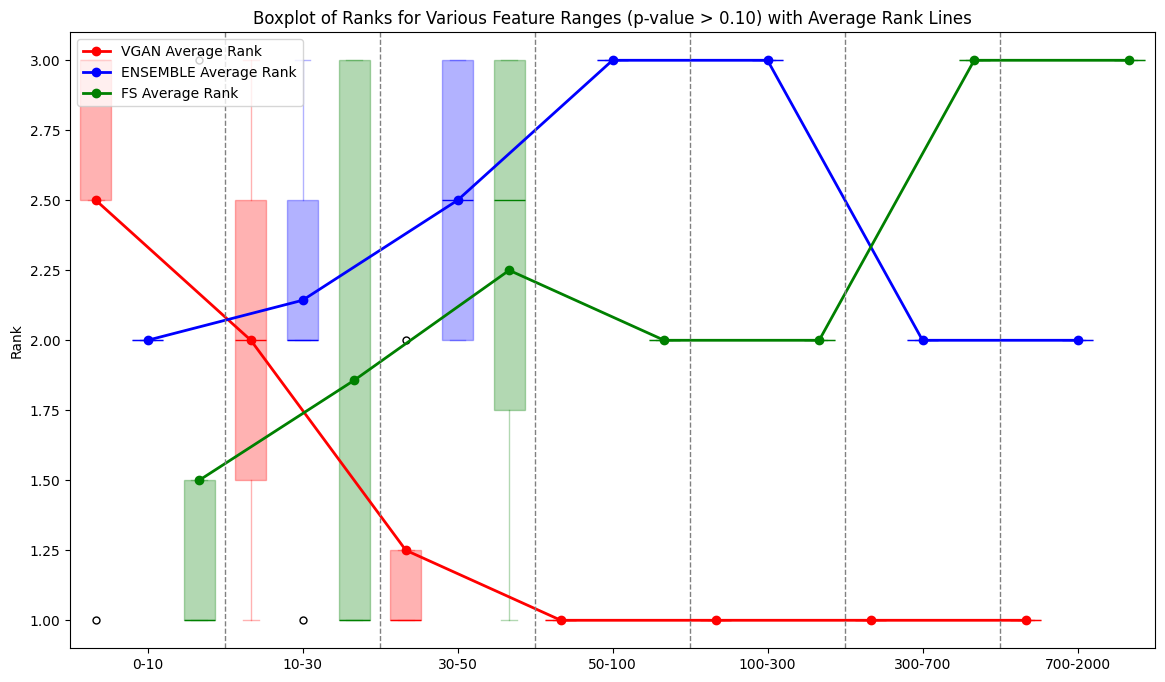

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('Full_table_with_ranks-KNN.csv', delimiter=',',)

# Filter the datasets where p-value > 0.10
filtered_pvalue_df = df
filtered_pvalue_df = df[df['p-value'] > 0.10]

# Further filter by the feature ranges
filtered_pvalue_0_10 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] > 0) & (filtered_pvalue_df['# Features'] <= 10)]
filtered_pvalue_10_30 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 10) & (filtered_pvalue_df['# Features'] <= 30)]
filtered_pvalue_30_50 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 30) & (filtered_pvalue_df['# Features'] <= 50)]
filtered_pvalue_50_100 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 50) & (filtered_pvalue_df['# Features'] <= 100)]
filtered_pvalue_100_300 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 100) & (filtered_pvalue_df['# Features'] <= 300)]
filtered_pvalue_300_700 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 300) & (filtered_pvalue_df['# Features'] <= 700)]
filtered_pvalue_700_2000 = filtered_pvalue_df[(
    filtered_pvalue_df['# Features'] >= 700) & (filtered_pvalue_df['# Features'] <= 2000)]

# Extract VGAN, ENSEMBLE, and FS ranks for these filtered datasets
vgan_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK VGAN']
vgan_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK VGAN']
vgan_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK VGAN']
vgan_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK VGAN']
vgan_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK VGAN']
vgan_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK VGAN']
vgan_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK VGAN']

ensemble_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK ENS']
ensemble_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK ENS']
ensemble_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK ENS']
ensemble_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK ENS']
ensemble_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK ENS']
ensemble_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK ENS']
ensemble_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK ENS']

fs_pvalue_ranks_0_10 = filtered_pvalue_0_10['RANK FS']
fs_pvalue_ranks_10_30 = filtered_pvalue_10_30['RANK FS']
fs_pvalue_ranks_30_50 = filtered_pvalue_30_50['RANK FS']
fs_pvalue_ranks_50_100 = filtered_pvalue_50_100['RANK FS']
fs_pvalue_ranks_100_300 = filtered_pvalue_100_300['RANK FS']
fs_pvalue_ranks_300_700 = filtered_pvalue_300_700['RANK FS']
fs_pvalue_ranks_700_2000 = filtered_pvalue_700_2000['RANK FS']

# Calculating the average ranks for each group
all_averages = {
    "0-10": vgan_pvalue_ranks_0_10.mean(),
    "10-30": vgan_pvalue_ranks_10_30.mean(),
    "30-50": vgan_pvalue_ranks_30_50.mean(),
    "50-100": vgan_pvalue_ranks_50_100.mean(),
    "100-300": vgan_pvalue_ranks_100_300.mean(),
    "300-700": vgan_pvalue_ranks_300_700.mean(),
    "700-2000": vgan_pvalue_ranks_700_2000.mean()
}


# Creating the combined boxplot with individual boxplots, line plots of the average ranks, and vertical lines to indicate group limits
plt.figure(figsize=(14, 8))

# Creating the boxplots for VGAN, ENSEMBLE, and FS
boxplot_vgan = plt.boxplot(
    [vgan_pvalue_ranks_0_10, vgan_pvalue_ranks_10_30, vgan_pvalue_ranks_30_50, vgan_pvalue_ranks_50_100,
        vgan_pvalue_ranks_100_300, vgan_pvalue_ranks_300_700, vgan_pvalue_ranks_700_2000],
    positions=[1, 4, 7, 10, 13, 16, 19],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='red', color='red', alpha=0.3),
    whiskerprops=dict(color='red', alpha=0.3),
    capprops=dict(color='red', alpha=0.3),
    medianprops=dict(color='red'),
    flierprops=dict(marker='o', markersize=5,
                    linestyle='none', linewidth=2, color='red')
)

boxplot_ensemble = plt.boxplot(
    [ensemble_pvalue_ranks_0_10, ensemble_pvalue_ranks_10_30, ensemble_pvalue_ranks_30_50, ensemble_pvalue_ranks_50_100,
        ensemble_pvalue_ranks_100_300, ensemble_pvalue_ranks_300_700, ensemble_pvalue_ranks_700_2000],
    positions=[2, 5, 8, 11, 14, 17, 20],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='blue', color='blue', alpha=0.3),
    whiskerprops=dict(color='blue', alpha=0.3),
    capprops=dict(color='blue', alpha=0.3),
    medianprops=dict(color='blue'),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color='blue')
)

boxplot_fs = plt.boxplot(
    [fs_pvalue_ranks_0_10, fs_pvalue_ranks_10_30, fs_pvalue_ranks_30_50, fs_pvalue_ranks_50_100,
        fs_pvalue_ranks_100_300, fs_pvalue_ranks_300_700, fs_pvalue_ranks_700_2000],
    positions=[3, 6, 9, 12, 15, 18, 21],
    widths=0.6,
    patch_artist=True,
    boxprops=dict(facecolor='green', color='green', alpha=0.3),
    whiskerprops=dict(color='green', alpha=0.3),
    capprops=dict(color='green', alpha=0.3),
    medianprops=dict(color='green'),
    flierprops=dict(marker='o', markersize=5, linestyle='none',
                    linewidth=2, color='green')
)

# Plotting the average ranks for VGAN, ENSEMBLE, and FS as line plots on top of the boxplots
plt.plot(
    [1, 4, 7, 10, 13, 16, 19],
    [all_averages["0-10"], all_averages["10-30"], all_averages["30-50"], all_averages["50-100"],
        all_averages["100-300"], all_averages["300-700"], all_averages["700-2000"]],
    color='red', marker='o', linestyle='-', linewidth=2, label='VGAN Average Rank'
)

plt.plot(
    [2, 5, 8, 11, 14, 17, 20],
    [ensemble_pvalue_ranks_0_10.mean(), ensemble_pvalue_ranks_10_30.mean(), ensemble_pvalue_ranks_30_50.mean(), ensemble_pvalue_ranks_50_100.mean(),
     ensemble_pvalue_ranks_100_300.mean(), ensemble_pvalue_ranks_300_700.mean(), ensemble_pvalue_ranks_700_2000.mean()],
    color='blue', marker='o', linestyle='-', linewidth=2, label='ENSEMBLE Average Rank'
)

plt.plot(
    [3, 6, 9, 12, 15, 18, 21],
    [fs_pvalue_ranks_0_10.mean(), fs_pvalue_ranks_10_30.mean(), fs_pvalue_ranks_30_50.mean(), fs_pvalue_ranks_50_100.mean(),
     fs_pvalue_ranks_100_300.mean(), fs_pvalue_ranks_300_700.mean(), fs_pvalue_ranks_700_2000.mean()],
    color='green', marker='o', linestyle='-', linewidth=2, label='FS Average Rank'
)

# Adding vertical lines to indicate the limits of each group on the x-axis
for x in [3.5, 6.5, 9.5, 12.5, 15.5, 18.5]:
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)

# Setting the x-axis labels
plt.xticks([2, 5, 8, 11, 14, 17, 20], ['0-10', '10-30',
           '30-50', '50-100', '100-300', '300-700', '700-2000'])

plt.title('Boxplot of Ranks for Various Feature Ranges (p-value > 0.10) with Average Rank Lines')
plt.ylabel('Rank')
plt.legend()
plt.show()


In [63]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Load the data
df = pd.read_csv('Full_table_with_ranks.csv', delimiter=';')


df['p-value'] = pd.to_numeric(df['p-value'].str.replace(',',
                              '.'), errors='coerce')
df = df[df['p-value'] > 0.10]

# Extracting the ranks for each model
ranks_ens = df['RANK ENS']
ranks_fs = df['RANK FS']
ranks_vgan = df['RANK VGAN']

# Performing the Kruskal-Wallis test
kruskal_result = stats.kruskal(ranks_ens, ranks_fs, ranks_vgan)
print(f"Kruskal-Wallis Test Result: {kruskal_result}")

# If the p-value from Kruskal-Wallis test is significant, perform Conover-Iman test
if kruskal_result.pvalue < 0.05:
    conover_result = sp.posthoc_conover([ranks_ens, ranks_fs, ranks_vgan], p_adjust='holm')
    conover_result.index = ["Feature Bagging", "Full-Space", "VGAN"]
    conover_result.columns =  ["Feature Bagging", "Full-Space", "VGAN"]
    print("Conover-Iman Test Result:\n", conover_result)
    
else:
    print("Kruskal-Wallis test is not significant; no need to perform Conover-Iman test.")
print(f"Count of datasets:{df.index.__len__()}")

Kruskal-Wallis Test Result: KruskalResult(statistic=43.35815961965841, pvalue=3.844990453467616e-10)
Conover-Iman Test Result:
                  Feature Bagging    Full-Space          VGAN
Feature Bagging         1.000000  1.946451e-06  5.749680e-03
Full-Space              0.000002  1.000000e+00  2.785200e-12
VGAN                    0.005750  2.785200e-12  1.000000e+00
Count of datasets:42


In [48]:
import pandas as pd
import scipy.stats as stats
import scikit_posthocs as sp

# Load the data
df = pd.read_csv('Full_table_with_ranks.csv', delimiter=';')


df['p-value'] = pd.to_numeric(df['p-value'].str.replace(',',
                              '.'), errors='coerce')
df = df[df['p-value'] < 0.10]

# Extracting the ranks for each model
ranks_ens = df['RANK ENS']
ranks_fs = df['RANK FS']
ranks_vgan = df['RANK VGAN']

# Performing the Kruskal-Wallis test
kruskal_result = stats.kruskal(ranks_ens, ranks_fs, ranks_vgan)
print(f"Kruskal-Wallis Test Result: {kruskal_result}")

# If the p-value from Kruskal-Wallis test is significant, perform Conover-Iman test
if kruskal_result.pvalue < 0.05:
    conover_result = sp.posthoc_conover([ranks_ens, ranks_fs, ranks_vgan], p_adjust='holm')
    conover_result.index = ["Feature Bagging", "Full-Space", "VGAN"]
    conover_result.columns =  ["Feature Bagging", "Full-Space", "VGAN"]
    print("Conover-Iman Test Result:\n", conover_result)
    
else:
    print("Kruskal-Wallis test is not significant; no need to perform Conover-Iman test.")
print(f"Count of datasets:{df.index.__len__()}")

Kruskal-Wallis Test Result: KruskalResult(statistic=7.478103166344593, pvalue=0.02377664260916227)
Conover-Iman Test Result:
                  Feature Bagging  Full-Space      VGAN
Feature Bagging         1.000000    0.085394  0.465640
Full-Space              0.085394    1.000000  0.021531
VGAN                    0.465640    0.021531  1.000000
Count of datasets:15
